# Stock Kmeans - Time Series Analysis and Prediction

### Importing Libraries

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tabulate import tabulate
from sklearn.metrics import davies_bouldin_score
import warnings
warnings.simplefilter('ignore')

### Data Preprocesing

In [240]:
df = pd.read_csv(r'C:/Users/PC/Desktop/ML/Data/Microsoft_Stock.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Dates'] = df['Date'].dt.date
df.head(5)

,Date,Open,High,Low,Close,Volume,Dates
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,2015-04-01
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,2015-04-02
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,2015-04-06
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,2015-04-07
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,2015-04-08


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
 6   Dates   1511 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 82.8+ KB


In [212]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [213]:
df.mean()

Open      1.073860e+02
High      1.084375e+02
Low       1.062945e+02
Close     1.074221e+02
Volume    3.019863e+07
dtype: float64

In [214]:
df.median()

Open            93.99
High            95.10
Low             92.92
Close           93.86
Volume    26629615.00
dtype: float64

In [215]:
df.skew()

Open      0.826540
High      0.828264
Low       0.827607
Close     0.827377
Volume    2.398168
dtype: float64

In [216]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Dates     0
dtype: int64

In [217]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dates'], dtype='object')

In [218]:
df.shape

(1511, 7)

### Exploratory Data Analysis

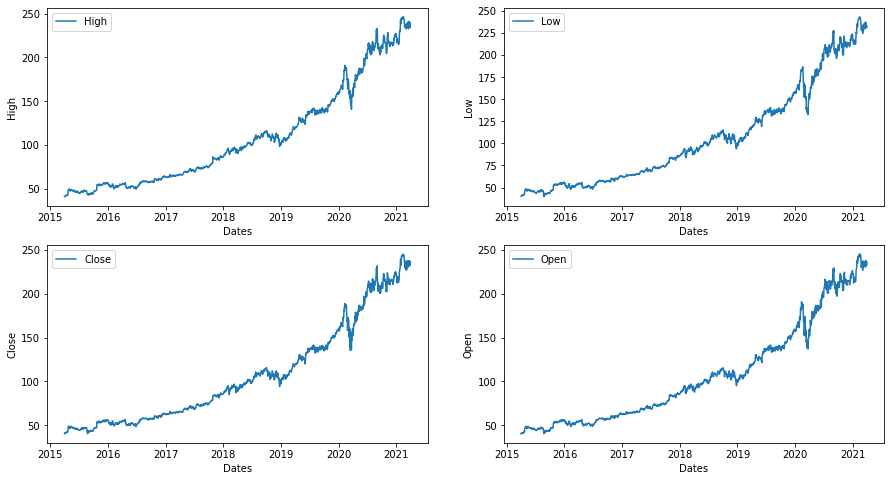

In [219]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

sns.lineplot(data=df, x='Dates', y='High', label='High', ax = ax[0,0])
sns.lineplot(data=df, x='Dates', y='Low', label='Low',ax = ax[0,1])
sns.lineplot(data=df, x='Dates', y='Close', label='Close',ax = ax[1,0])
sns.lineplot(data=df, x='Dates', y='Open', label='Open',ax = ax[1,1])

plt.show()

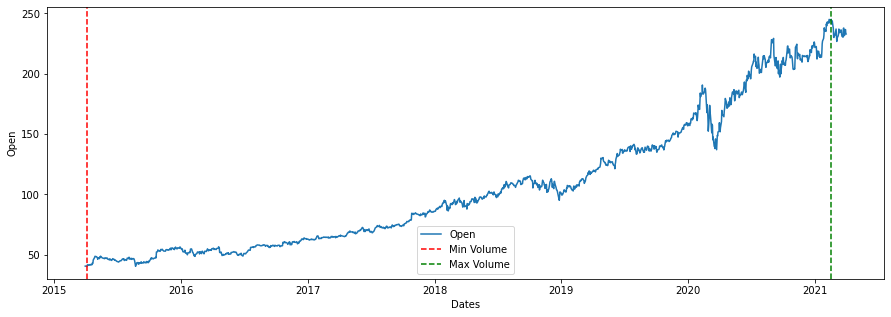

In [220]:
plt.figure(figsize=(15,5))

sns.lineplot(data=df, x='Dates', y='Open', label='Open')

min_index = df['Open'].idxmin()
max_index = df['Open'].idxmax()

min_date = df.loc[min_index, 'Dates']
max_date = df.loc[max_index, 'Dates']

plt.axvline(x=min_date, color='r', linestyle='--', label='Min Volume')
plt.axvline(x=max_date, color='g', linestyle='--', label='Max Volume')

plt.legend()
plt.show()

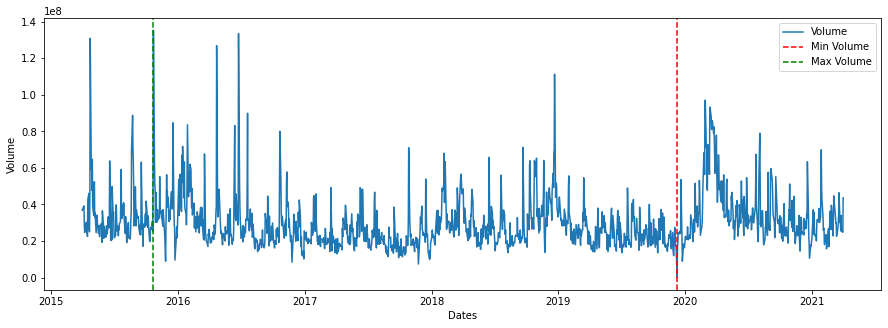

In [52]:
plt.figure(figsize=(15,5))

sns.lineplot(data=df, x='Dates', y='Volume', label='Volume')

min_index = df['Volume'].idxmin()
max_index = df['Volume'].idxmax()

min_date = df.loc[min_index, 'Dates']
max_date = df.loc[max_index, 'Dates']

plt.axvline(x=min_date, color='r', linestyle='--', label='Min Volume')
plt.axvline(x=max_date, color='g', linestyle='--', label='Max Volume')

plt.legend()
plt.show()

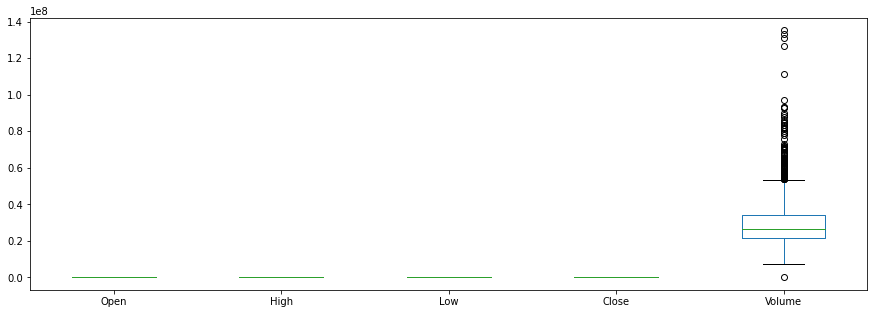

In [38]:
df.boxplot(figsize=(15,5))
plt.grid(False)
plt.show()

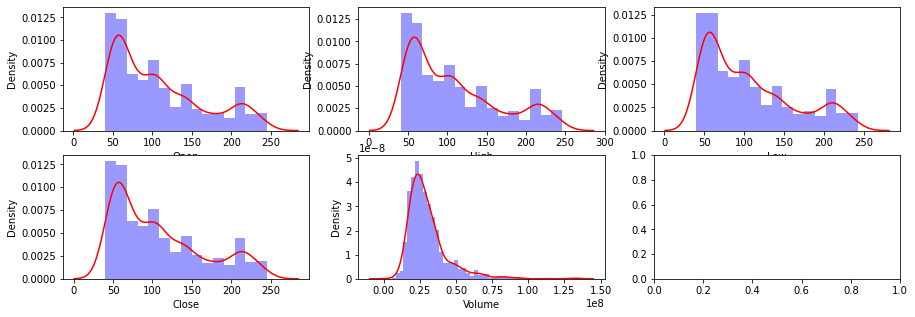

In [40]:
fig, ax = plt.subplots(2, 3, figsize=(20, 5))

sns.distplot(df['Open'],ax=ax[0,0], color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['High'],ax=ax[0,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Low'],ax=ax[0,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Close'],ax=ax[1,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Volume'],ax=ax[1,1],  color = 'red', hist_kws={'color': 'blue'})

plt.show()

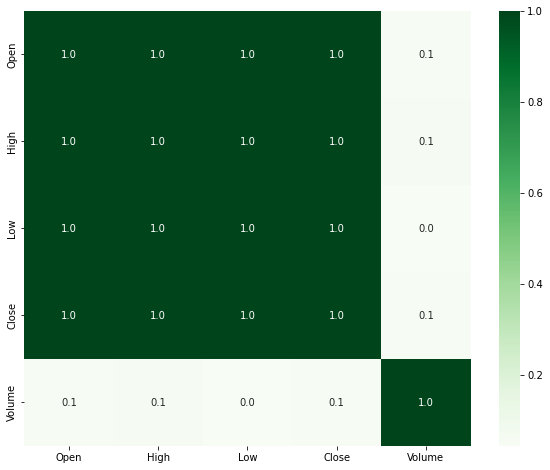

In [25]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap='Greens')
plt.show()

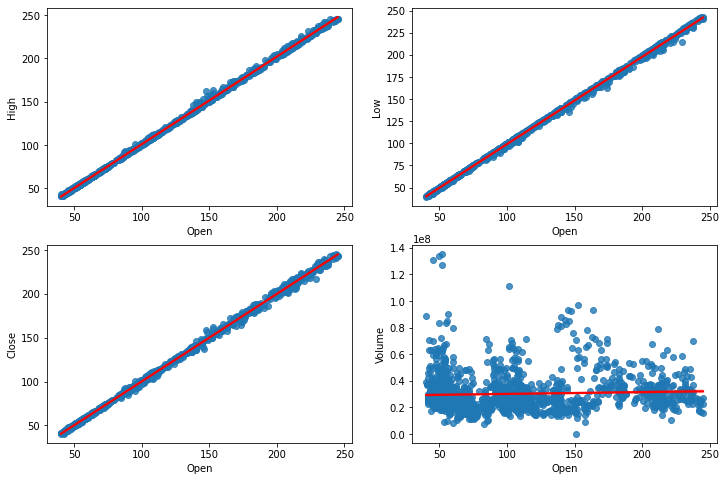

In [55]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

sns.regplot(x = "Open", y = "High", data = df, line_kws = {"color": "red"},ax = ax[0,0])
sns.regplot(data = df, x='Open', y='Low', line_kws = {"color": "red"},ax = ax[0,1])
sns.regplot(data = df, x='Open', y='Close', line_kws = {"color": "red"},ax = ax[1,0])
sns.regplot(data = df, x='Open', y='Volume', line_kws = {"color": "red"},ax = ax[1,1])

plt.show()

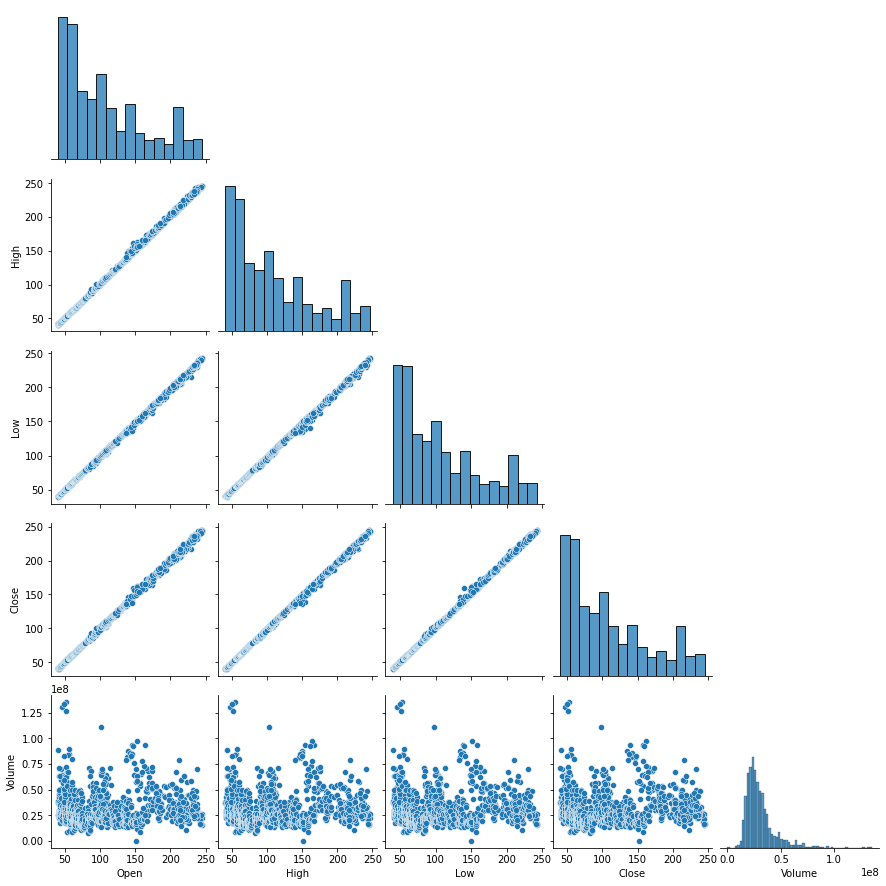

In [58]:
sns.pairplot(df, corner=True)
plt.show()

### KMeans Modeling and Evaluation

In [179]:
filtered_df = df[(df['Volume'] > 0) & (df['Close'] > 0)]
X = filtered_df[['Volume', 'Close']]

### Scaler

In [180]:
min_max_scaler = MinMaxScaler()
df_scaled = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)

In [181]:
df_scaler = pd.DataFrame(df_scaled)
df_scaler = df_scaler.rename(columns = {0: 'Close', 1: 'Volume'})

### KMeans

In [182]:
kmeans = KMeans(n_clusters=4, random_state= 42).fit(df_scaler)

In [183]:
centroids = kmeans.cluster_centers_

In [184]:
labels = kmeans.predict(df_scaler)
labels_series = pd.Series(labels)
labels_series.value_counts()

0    663
3    464
1    286
2     98
dtype: int64

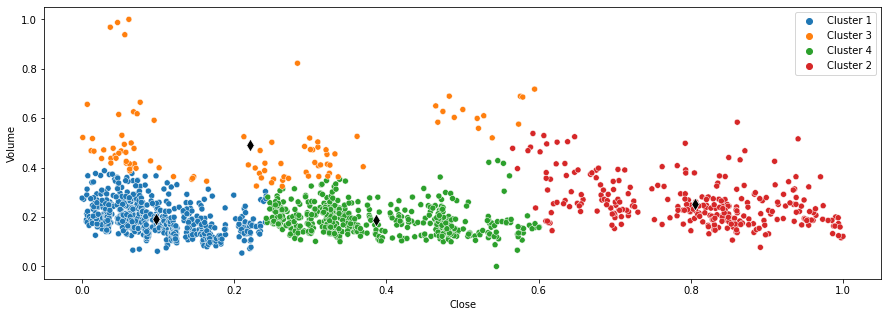

In [185]:
colours = ['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4']
target = [colours[A] for A in labels]

plt.figure(figsize=(15,5))
sns.scatterplot(data=df_scaler, x="Close", y="Volume", hue=target)
sns.scatterplot(x=centroids[:, 1], y=centroids[:, 0], marker='d', color = 'black',s=80)
plt.show()

In [186]:
inertia = kmeans.inertia_
db_index = davies_bouldin_score(X, labels)
print(f'Inertia: {inertia} and Davies-Bouldin Index: {db_index}')

Inertia: 20.894507377409166 and Davies-Bouldin Index: 14.198027973289781


#### In the scatter plot, four groups are observed and can be classified as follows:
*Red Group: Characterized by high closing values and low volume.*
 *Green Group: Exhibits medium volume and intermediate closing values.*
 *Blue Group: Stands out with medium volume and low closing values.*
 *Orange Group: Distinguished by low closing values and high volume.*
 *It's important to note that points located outside these cluster groups are considered outliers.*

### Time Series Modeling and Evaluation

In [241]:
df.set_index('Dates', inplace=True)

### ARIMA Model for Open

<Figure size 1080x1440 with 0 Axes>

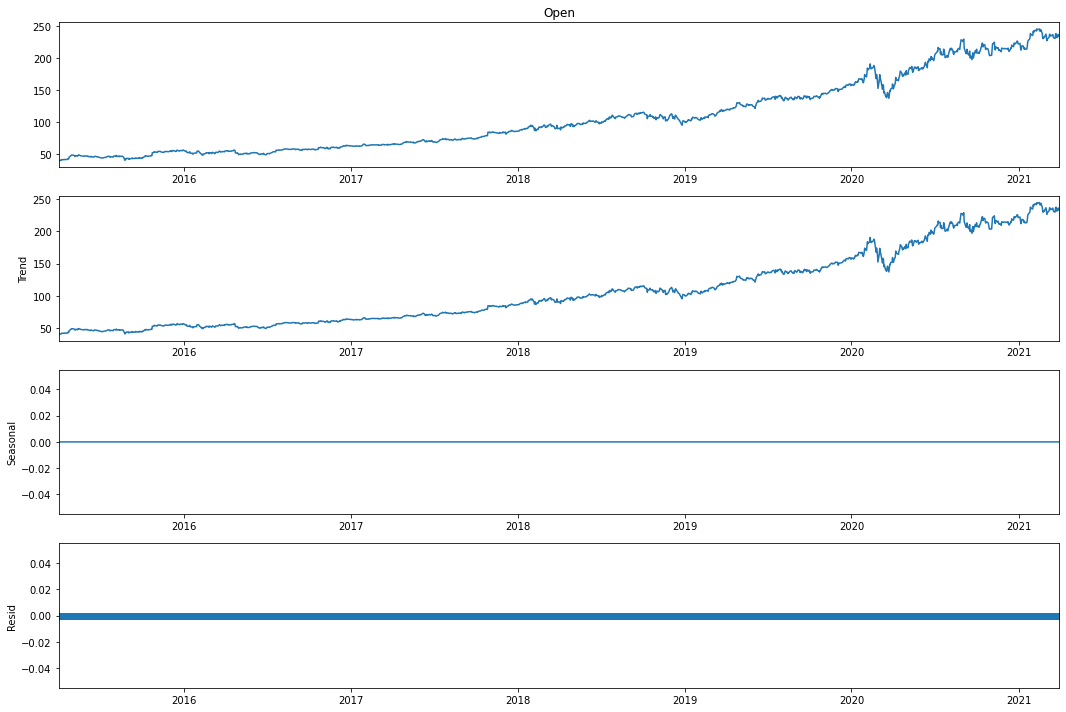

In [242]:
descompose = seasonal_decompose(df['Open'], model='additive', period=1)
plt.rcParams['figure.figsize'] = (15, 10)
plt.figure(figsize=(15, 20))
descompose.plot()
plt.show()

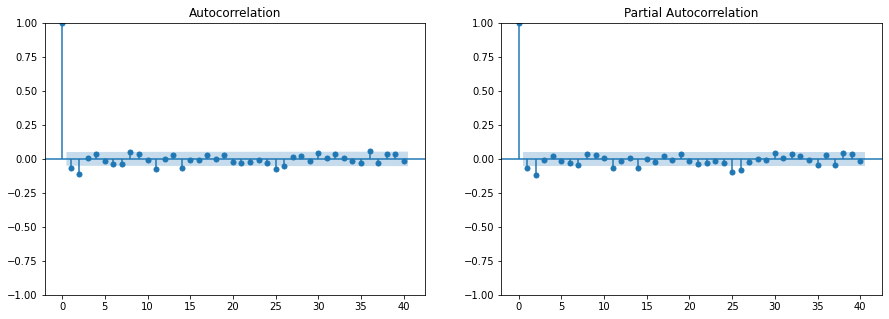

In [243]:
df_g1 = df.groupby(['Dates'])['Open'].sum()

df_diff = df_g1.diff().dropna()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(df_diff, lags=40, ax=ax[0])
plot_pacf(df_diff, lags=40, ax=ax[1])

plt.show()

In [244]:
model = ARIMA(df_g1,  order=(1, 1, 1))

results = model.fit()

summary_table_atend = results.summary()

summary_table_atend

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                 1511
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3294.580
Date:                Thu, 23 Nov 2023   AIC                           6595.160
Time:                        20:18:22   BIC                           6611.120
Sample:                             0   HQIC                          6601.104
                               - 1511                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5022      0.087      5.775      0.000       0.332       0.673
ma.L1         -0.5914      0.081     -7.295      0.000      -0.750      -0.432
sigma2         4.5988      0.073     62.673      0.000       4.455       4.743
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):              5084.22
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):              20.06   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

╒═══════╤═════════════╕
│       │      Resids │
╞═══════╪═════════════╡
│ count │ 1511        │
├───────┼─────────────┤
│ mean  │    0.182115 │
├───────┼─────────────┤
│ std   │    2.3785   │
├───────┼─────────────┤
│ min   │  -15.6892   │
├───────┼─────────────┤
│ 25%   │   -0.517785 │
├───────┼─────────────┤
│ 50%   │    0.111585 │
├───────┼─────────────┤
│ 75%   │    0.84869  │
├───────┼─────────────┤
│ max   │   40.6      │
╘═══════╧═════════════╛


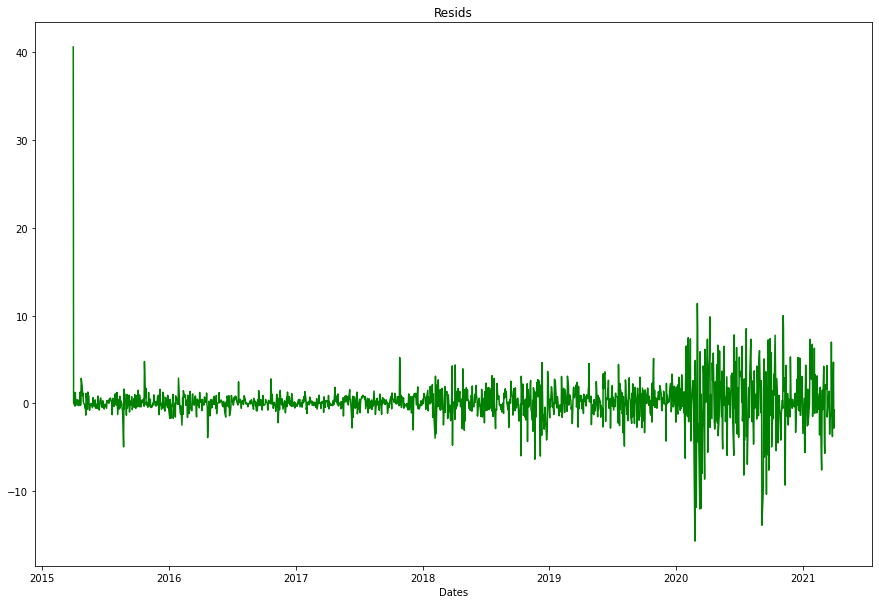

In [245]:
results.resid.plot( color='green', title="Resids")

resid_summary_atend_df = pd.DataFrame(results.resid.describe(), columns=['Resids'])

print(tabulate(resid_summary_atend_df, headers='keys', tablefmt='fancy_grid'))

In [278]:
n_pasos = 10
modeler = ARIMA(df_g1, order=(1, 1, 1))
results = modeler.fit()
forecast1 = results.forecast(steps=n_pasos)

start_date = df_g1.index[1000]
end_date = df_g1.index[-1]
prediccion = results.predict(start=start_date, end=end_date)

In [255]:
df_g1.index[1000]

datetime.date(2019, 3, 22)

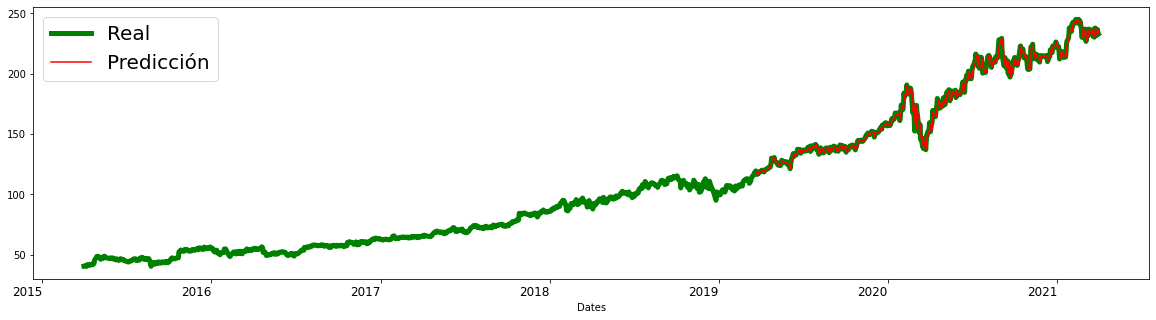

In [280]:
plt.figure(figsize=(20, 5))

plt.plot(df_g1, label='Real',linewidth=5, color='green')
sns.lineplot(prediccion.index, prediccion.values, label='Predicción',color='red')

plt.legend(fontsize=20)
plt.xticks(ha='right', fontsize=12)
plt.show()

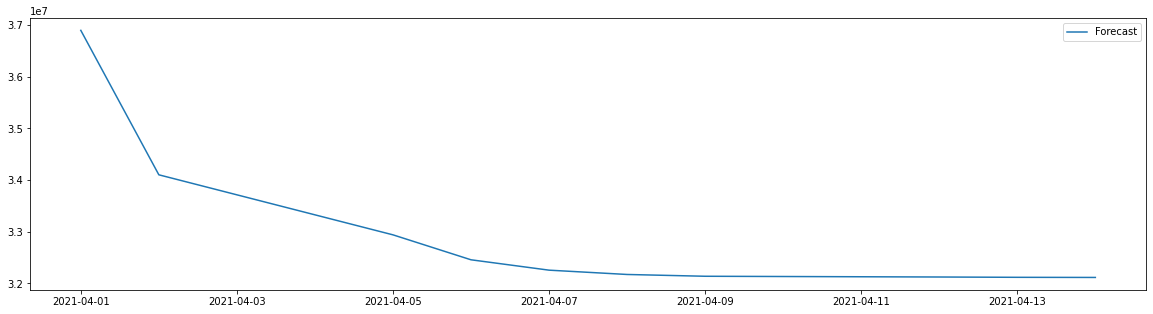

In [281]:
forecast_steps = 10 
forecast_index = pd.date_range(start=df_g1.index[-1], periods=forecast_steps + 1, freq='B')[1:]
plt.figure(figsize =(20,5))
sns.lineplot(forecast_index, forecast.values, label='Forecast')
plt.show()

### ARIMA Model for Volume

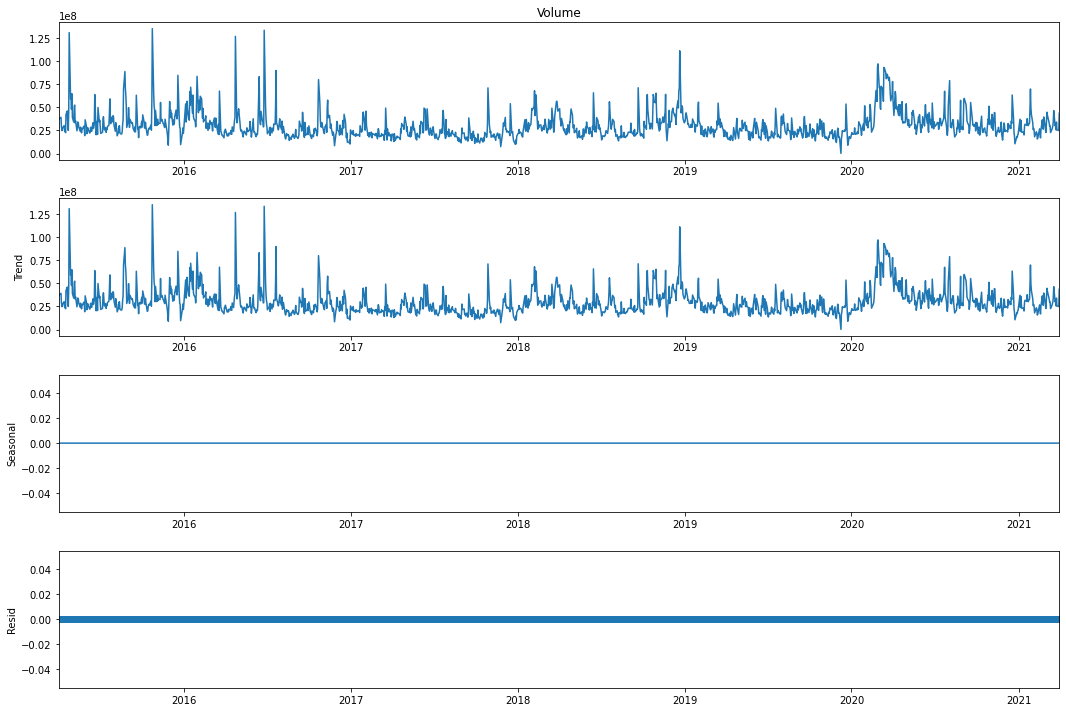

In [282]:
descompose = seasonal_decompose(df['Volume'], model='additive', period=1)
plt.rcParams['figure.figsize'] = (15, 10)
descompose.plot()
plt.show()

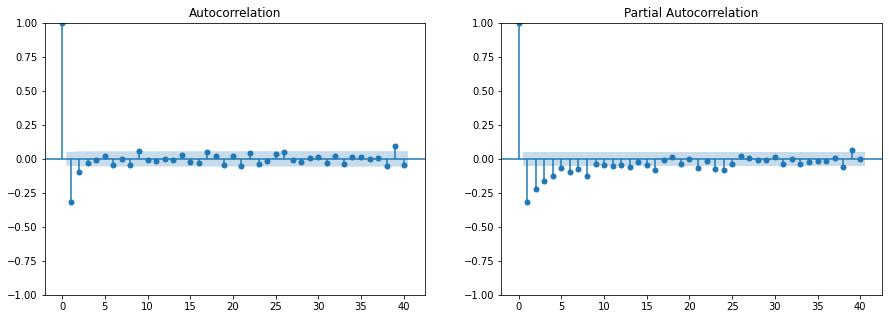

In [283]:
df_g2 = df.groupby(['Dates'])['Volume'].sum()
df_diff = df_g2.diff().dropna()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(df_diff, lags=40, ax=ax[0])
plot_pacf(df_diff, lags=40, ax=ax[1])

plt.show()

In [284]:
model = ARIMA(df_g2,  order=(1, 1, 1))

results = model.fit()

summary_table_atend = results.summary()

summary_table_atend

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Volume   No. Observations:                 1511
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -26589.630
Date:                Thu, 23 Nov 2023   AIC                          53185.260
Time:                        20:31:49   BIC                          53201.220
Sample:                             0   HQIC                         53191.204
                               - 1511                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4156      0.021     19.778      0.000       0.374       0.457
ma.L1         -0.9020      0.015    -60.331      0.000      -0.931      -0.873
sigma2       1.23e+14        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):             24501.25
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             2.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.06e+45. Standard errors may be unstable.
"""

╒═══════╤═════════════════╕
│       │          Resids │
╞═══════╪═════════════════╡
│ count │  1511           │
├───────┼─────────────────┤
│ mean  │ 57417.9         │
├───────┼─────────────────┤
│ std   │     1.07769e+07 │
├───────┼─────────────────┤
│ min   │    -4.50876e+07 │
├───────┼─────────────────┤
│ 25%   │    -5.36676e+06 │
├───────┼─────────────────┤
│ 50%   │    -1.65908e+06 │
├───────┼─────────────────┤
│ 75%   │     3.25123e+06 │
├───────┼─────────────────┤
│ max   │     1.02596e+08 │
╘═══════╧═════════════════╛


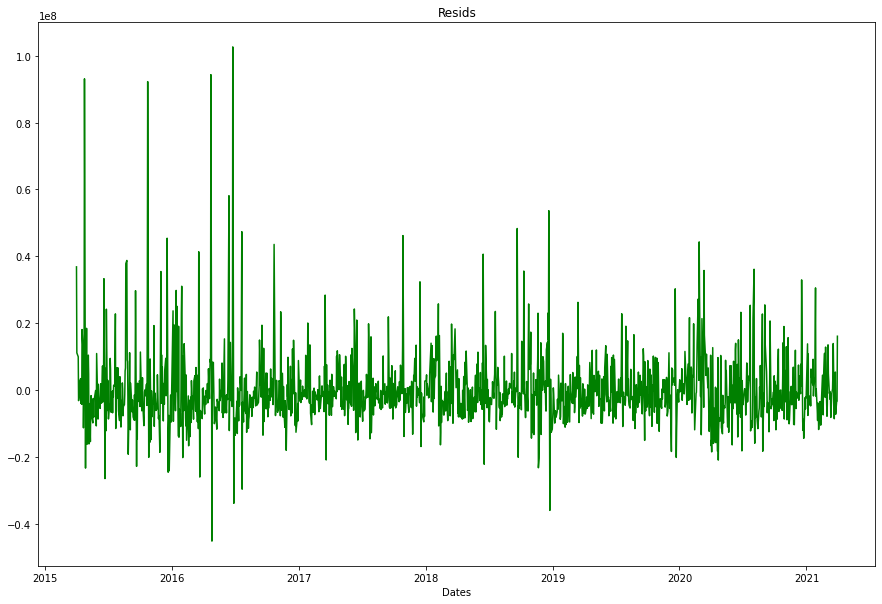

In [285]:
results.resid.plot( color='green', title="Resids")

resid_summary_atend_df = pd.DataFrame(results.resid.describe(), columns=['Resids'])

print(tabulate(resid_summary_atend_df, headers='keys', tablefmt='fancy_grid'))

In [286]:
n_pasos = 10
modeler = ARIMA(df_g2, order=(1, 1, 1))
results = modeler.fit()
forecast = results.forecast(steps=n_pasos)

start_date = df_g2.index[0]
end_date = df_g2.index[-1]
prediccion = results.predict(start=start_date, end=end_date)

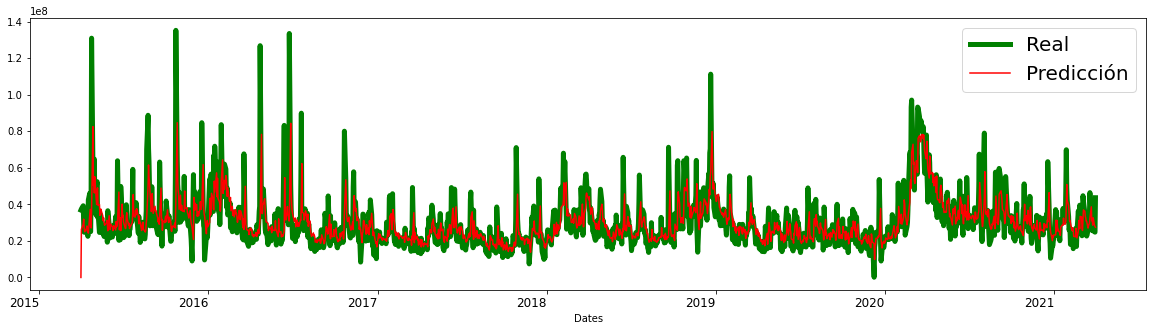

In [289]:
plt.figure(figsize=(20, 5))

plt.plot(df_g2, label='Real',linewidth=5, color='green')
sns.lineplot(prediccion.index, prediccion.values, label='Predicción', color='red')

plt.legend()
plt.xticks(ha='right', fontsize=12)
plt.legend(fontsize=20)
plt.show()

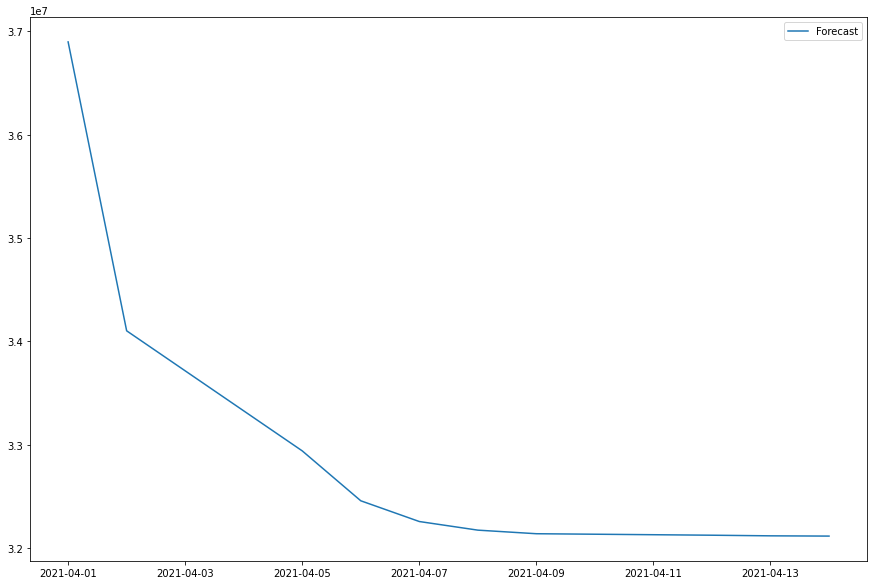

In [235]:
forecast_steps = 10  
forecast_index = pd.date_range(start=df_g2.index[-1], periods=forecast_steps + 1, freq='B')[1:]

sns.lineplot(forecast_index, forecast.values, label='Forecast')
plt.show()

### Evaluation ARIMA Model for Open

In [236]:
y_true = df_g1.tail(n_pasos)

mse = mean_squared_error(y_true, forecast1)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, forecast1)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

MSE: 7.254600858912928
RMSE: 2.693436626117817
MAE: 2.224410154536085


### Evaluation ARIMA Model for Volumen

In [237]:
y_true = df_g2.tail(n_pasos)

mse = mean_squared_error(y_true, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, forecast)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

MSE: 49036002126182.3
RMSE: 7002571.108256045
MAE: 5891597.891585042
